In [17]:
import pandas as pd
data= pd.read_csv ('WB_data.csv')

# Display the first 5 rows
print(data.head())

         Series Name  Series Code    Country Name Country Code      2001  \
0  Population, total  SP.POP.TOTL     Afghanistan          AFG  19688632   
1  Population, total  SP.POP.TOTL         Albania          ALB   3060173   
2  Population, total  SP.POP.TOTL         Algeria          DZA  31200985   
3  Population, total  SP.POP.TOTL  American Samoa          ASM     58324   
4  Population, total  SP.POP.TOTL         Andorra          AND     67820   

       2002      2003      2011      2012      2013      2021      2022  \
0  21000256  22645130  29249157  30466479  31541209  40099462  41128771   
1   3051010   3039616   2905195   2900401   2895092   2811666   2777689   
2  31624696  32055883  36543541  37260563  38000626  44177969  44903225   
3     58177     57941     54310     53691     52995     45035     44273   
4     70849     73907     70567     71013     71367     79034     79824   

       2023  
0  42239854  
1   2745972  
2  45606480  
3     43914  
4     80088  


In [19]:
# Inspect "Country Code" column
print(data['Country Code'].unique())

# Check for missing values in the entire dataset
print(data.isnull().sum())



['AFG' 'ALB' 'DZA' 'ASM' 'AND' 'AGO' 'ATG' 'ARG' 'ARM' 'ABW' 'AUS' 'AUT'
 'AZE' 'BHS' 'BHR' 'BGD' 'BRB' 'BLR' 'BEL' 'BLZ' 'BEN' 'BMU' 'BTN' 'BOL'
 'BIH' 'BWA' 'BRA' 'VGB' 'BRN' 'BGR' 'BFA' 'BDI' 'CPV' 'KHM' 'CMR' 'CAN'
 'CYM' 'CAF' 'TCD' 'CHI' 'CHL' 'CHN' 'COL' 'COM' 'COD' 'COG' 'CRI' 'CIV'
 'HRV' 'CUB' 'CUW' 'CYP' 'CZE' 'DNK' 'DJI' 'DMA' 'DOM' 'ECU' 'EGY' 'SLV'
 'GNQ' 'ERI' 'EST' 'SWZ' 'ETH' 'FRO' 'FJI' 'FIN' 'FRA' 'PYF' 'GAB' 'GMB'
 'GEO' 'DEU' 'GHA' 'GIB' 'GRC' 'GRL' 'GRD' 'GUM' 'GTM' 'GIN' 'GNB' 'GUY'
 'HTI' 'HND' 'HKG' 'HUN' 'ISL' 'IND' 'IDN' 'IRN' 'IRQ' 'IRL' 'IMN' 'ISR'
 'ITA' 'JAM' 'JPN' 'JOR' 'KAZ' 'KEN' 'KIR' 'PRK' 'KOR' 'XKX' 'KWT' 'KGZ'
 'LAO' 'LVA' 'LBN' 'LSO' 'LBR' 'LBY' 'LIE' 'LTU' 'LUX' 'MAC' 'MDG' 'MWI'
 'MYS' 'MDV' 'MLI' 'MLT' 'MHL' 'MRT' 'MUS' 'MEX' 'FSM' 'MDA' 'MCO' 'MNG'
 'MNE' 'MAR' 'MOZ' 'MMR' 'NAM' 'NRU' 'NPL' 'NLD' 'NCL' 'NZL' 'NIC' 'NER'
 'NGA' 'MKD' 'MNP' 'NOR' 'OMN' 'PAK' 'PLW' 'PAN' 'PNG' 'PRY' 'PER' 'PHL'
 'POL' 'PRT' 'PRI' 'QAT' 'ROU' 'RUS' 'RWA' 'WSM' 'S

In [21]:
# Find min and max across all years (starting from the 5th column onward)
min_overall = data.iloc[:, 4:].min().min()
max_overall = data.iloc[:, 4:].max().max()


In [22]:
# Find min and max for 2023
min_2023 = data['2023'].min()
max_2023 = data['2023'].max()
      
print(f"Overall Min: {min_overall}, Overall Max: {max_overall}")
print(f"Min​ in 2023: {min_2023}, Max in 2023: {max_2023}")      

Overall Min: 9609, Overall Max: 8024997028
Min​ in 2023: 11396, Max in 2023: 8024997028


In [34]:
# to see random samples/ entries from the dataset  
data["Country Name"].value_counts()           

Country Name
Afghanistan      1
Pakistan         1
Nepal            1
Netherlands      1
New Caledonia    1
                ..
Greece           1
Greenland        1
Grenada          1
Guam             1
World            1
Name: count, Length: 218, dtype: int64

In [23]:
# Filtering rows for Spain and India
filtered_countries = data[data['Country Name'].isin(['Spain', 'India'])]
print(filtered_countries)

           Series Name  Series Code Country Name Country Code        2001  \
89   Population, total  SP.POP.TOTL        India          IND  1078970907   
179  Population, total  SP.POP.TOTL        Spain          ESP    40850412   

           2002        2003        2011        2012        2013        2021  \
89   1098313039  1117415123  1257621191  1274487215  1291132063  1407563842   
179    41431558    42187645    46742697    46773055    46620045    47415794   

           2022        2023  
89   1417173173  1428627663  
179    47778340    48373336  


In [24]:
# Calculating the difference in population over time for Spain and India
population_diff = filtered_countries.iloc[:, 4:].diff(axis=1)
print(population_diff)

     2001      2002      2003       2011      2012      2013       2021  \
89    NaN  19342132  19102084  140206068  16866024  16644848  116431779   
179   NaN    581146    756087    4555052     30358   -153010     795749   

        2022      2023  
89   9609331  11454490  
179   362546    594996  


Matplotlib is building the font cache; this may take a moment.


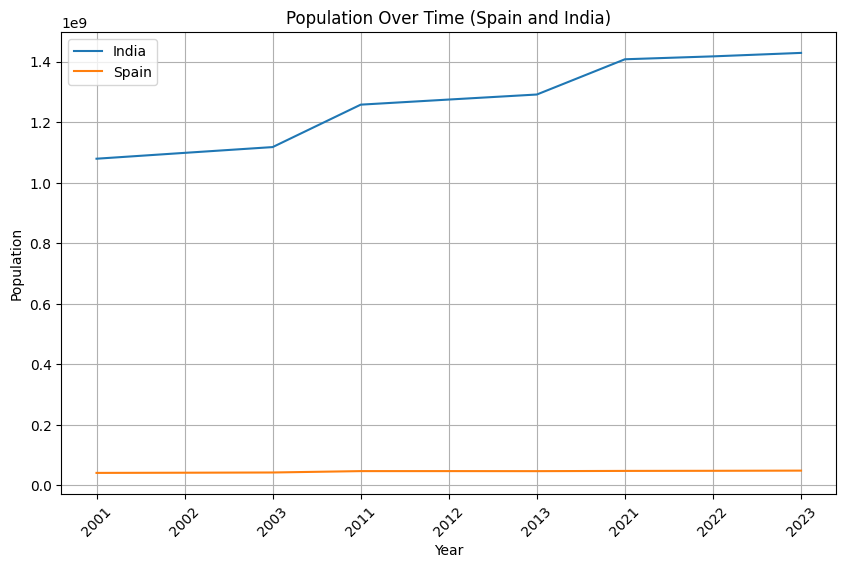

In [26]:
import matplotlib.pyplot as plt

# Plot population data for Spain and India
plt.figure(figsize=(10, 6))

for country in filtered_countries['Country Name']:
    country_data = filtered_countries[filtered_countries['Country Name'] == country]
    plt.plot(country_data.columns[4:], country_data.iloc[0, 4:], label=country)

plt.title('Population Over Time (Spain and India)')
plt.xlabel('Year')
plt.ylabel('Population')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

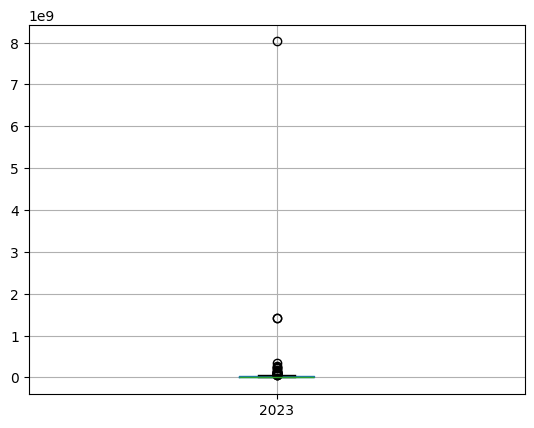

In [42]:
import matplotlib.pyplot as plt
plt.show(data.boxplot("2023"))